# EDA para las bases de datos

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
from wordcloud import WordCloud
import warnings

warnings.filterwarnings("ignore")

### Importamos el dataset con la información general de Steam

In [2]:
df = pd.read_csv('Dataset_Final.csv', low_memory=False)

In [3]:
df.columns                  #Revisamos las columnas

Index(['genres', 'app_name', 'release_date', 'id', 'developer', 'Accounting',
       'Action', 'Adventure', 'Animation &amp; Modeling', 'Audio Production',
       'Casual', 'Design &amp; Illustration', 'Early Access', 'Education',
       'Free to Play', 'Indie', 'Massively Multiplayer', 'Photo Editing',
       'RPG', 'Racing', 'Simulation', 'Software Training', 'Sports',
       'Strategy', 'Utilities', 'Video Production', 'Web Publishing',
       'user_id', 'items_count', 'steam_id', 'playtime_forever',
       'playtime_2weeks', 'user_url', 'funny', 'last_edited', 'item_id',
       'helpful', 'recommend', 'review', 'posted_year', 'sentiment_score'],
      dtype='object')

- Cargamos el dataset numérico para análisis de correlación de variables

In [22]:
df_numerico = pd.read_csv('Dataset_Final_Numeros.csv', low_memory=False)

In [23]:
df_numerico.info()                              #Revisamos el tipo de dato del dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52945 entries, 0 to 52944
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   release_date      52945 non-null  int64  
 1   id                52945 non-null  int64  
 2   Accounting        52945 non-null  int64  
 3   items_count       52945 non-null  int64  
 4   steam_id          52945 non-null  int64  
 5   playtime_forever  52945 non-null  int64  
 6   playtime_2weeks   52945 non-null  int64  
 7   item_id           52920 non-null  float64
 8   posted_year       43710 non-null  float64
 9   sentiment_score   52945 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 4.0 MB


## Realizamos un análisis de frecuencia de palabras

In [5]:
top_titles = df['app_name'].value_counts().nlargest(20)                                         #Obtenemos los títulos más comunes --> top-20
titles_text = ''.join(top_titles.index)                                                         #Crea una cadena con los título
WordCloud = WordCloud(width=1000, height=500, background_color='white').generate(titles_text)   #Crea la nube de palabras

#### Nube de palabras

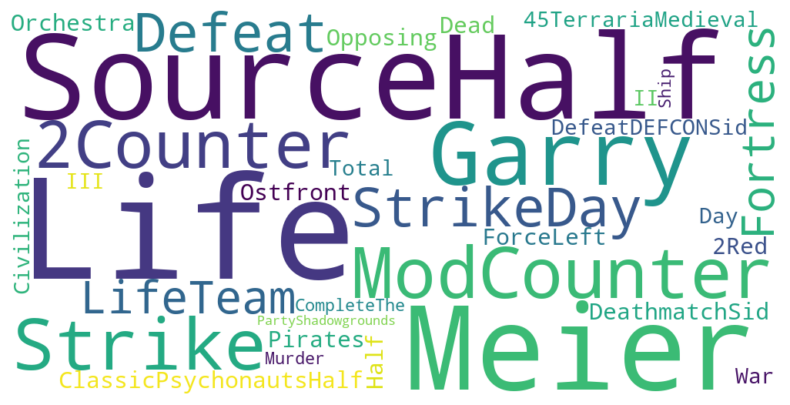

In [6]:
# Mostramos la nube de palabras utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Frecuencia de titles de juegos

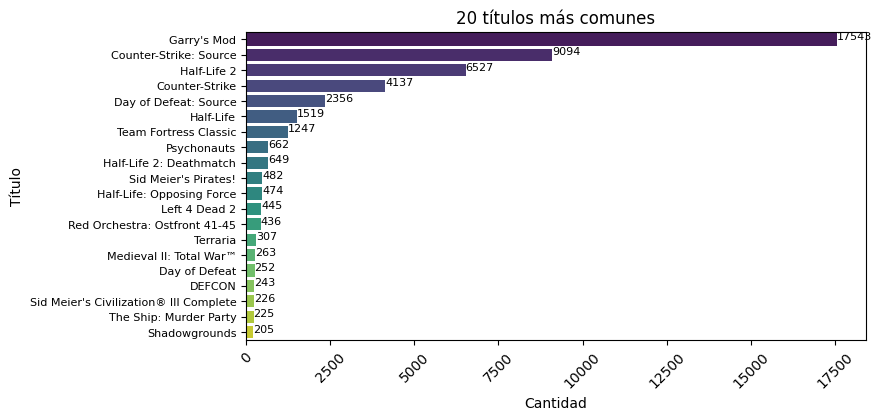

In [7]:
# Configuración de la figura y gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(y=top_titles.index, x=top_titles.values, palette='viridis')

# Etiquetas y título del gráfico
plt.xlabel('Cantidad')
plt.ylabel('Título')
plt.title('20 títulos más comunes')

# Rotación de las etiquetas en el eje x
plt.xticks(rotation=45)
plt.yticks(fontsize=8)

# Agregar el valor numérico en las barras
for index, value in enumerate(top_titles.values):
    plt.text(value, index, str(value), fontsize=8)

plt.show()

## Hacemos un análisis de dispersión de horas de juego por año

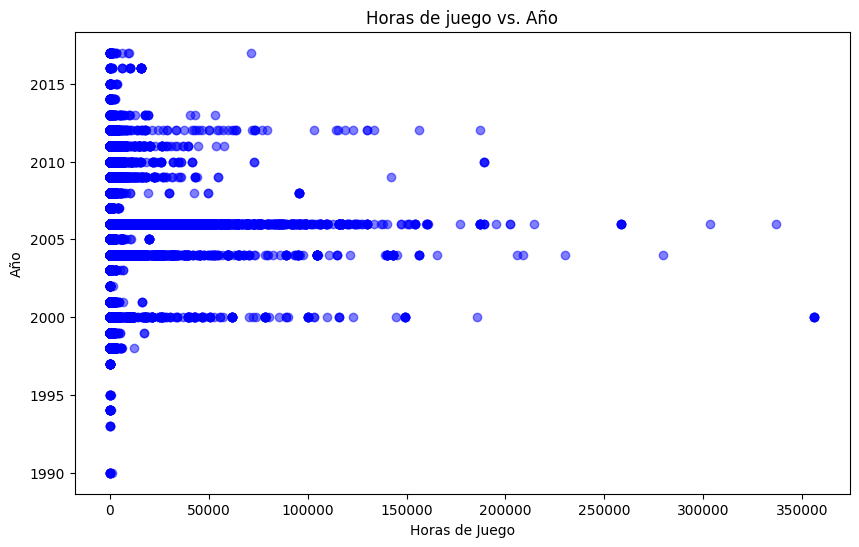

In [8]:
plt.figure(figsize=(10, 6))

# creacion del grafico de dispersion
plt.scatter(df['playtime_forever'], df['release_date'], color='blue', alpha=0.5)

# Agrega etiquetas y titulos
plt.title('Horas de juego vs. Año')
plt.xlabel('Horas de Juego')
plt.ylabel('Año');

## Hacemos un análisis de sentimiento por año y score

In [10]:
grouped_data = df.groupby(['posted_year', 'sentiment_score']).size().reset_index(name='count')

### Pivotamos los datos de 'sentiment_score' como una columna

In [11]:
pivot_data = grouped_data.pivot(index='posted_year', columns='sentiment_score', values='count')

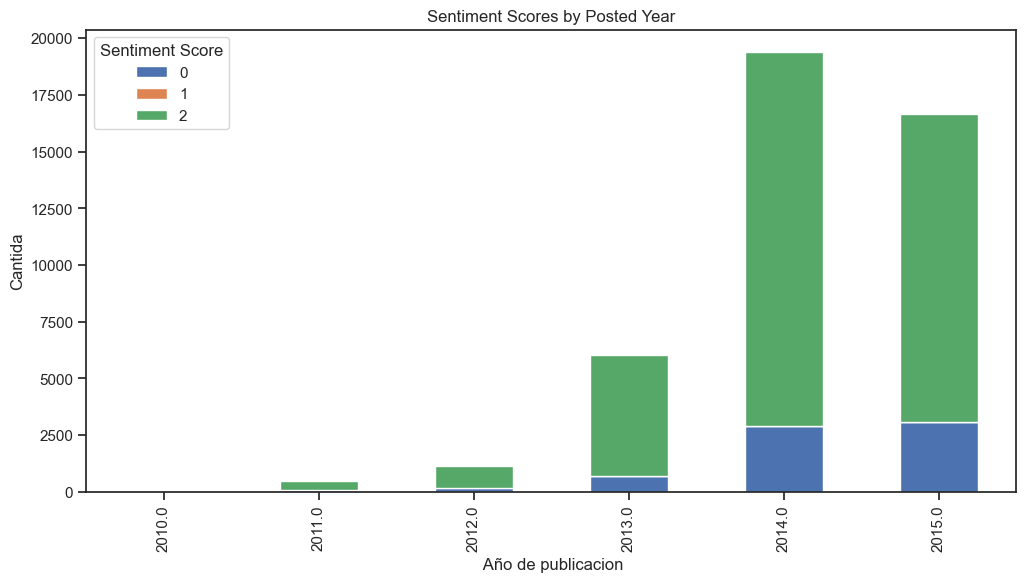

In [12]:
sns.set(style='ticks')
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel(' Año de publicacion')
plt.ylabel('Cantida')
plt.title('Sentiment Scores by Posted Year')
plt.legend(title='Sentiment Score', loc='upper left')
plt.show()

## Revisamos la correlación entre variables

In [24]:
df_numerico2 = df_numerico

<Axes: >

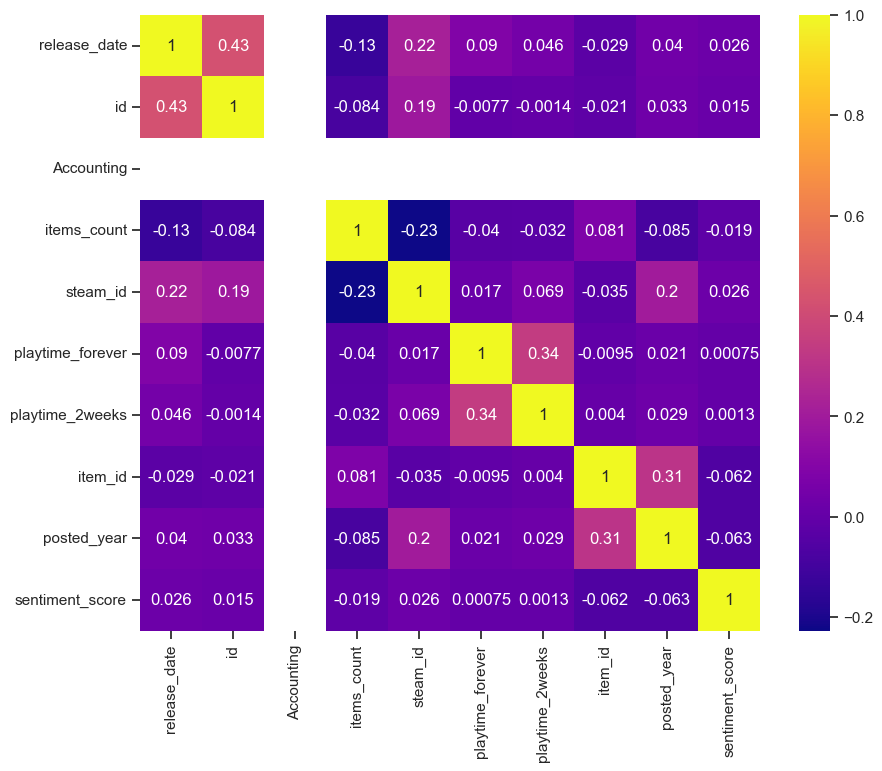

In [26]:
df_numerico2 = df_numerico2.select_dtypes(include=['float64', 'int64'])         # Filtrar solo las columnas numéricas
corr_matrix = df_numerico2.corr()                                               # Calculamos la matriz de correlación
plt.figure(figsize=(10, 8))                                                     # Graficamos el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='plasma')